# Feature Scaling
## Standardization & Normanization
https://www.datacamp.com/tutorial/normalization-vs-standardization

In [3]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo,list_available_datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,2]

In [4]:
ds = fetch_ucirepo(id=186) 
df=ds.data.features.join(ds.data.targets)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


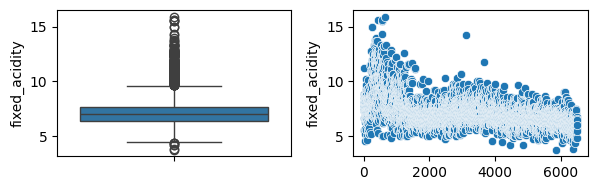

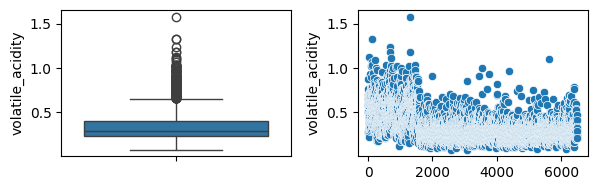

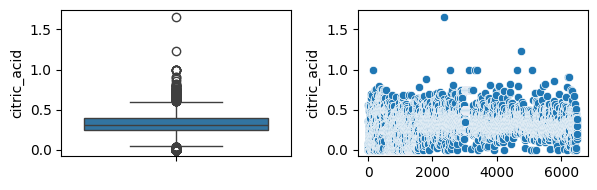

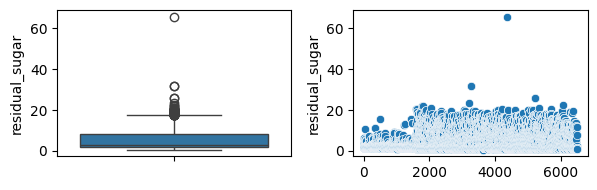

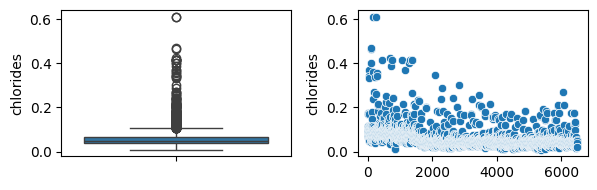

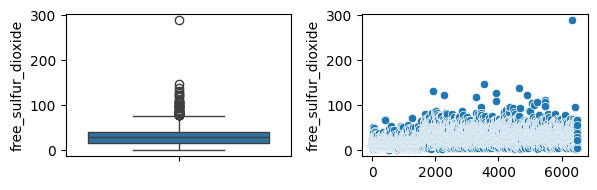

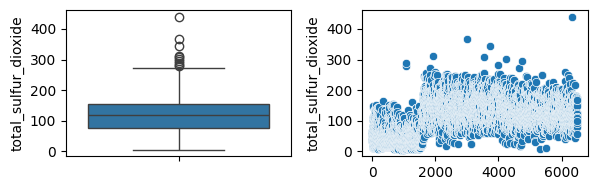

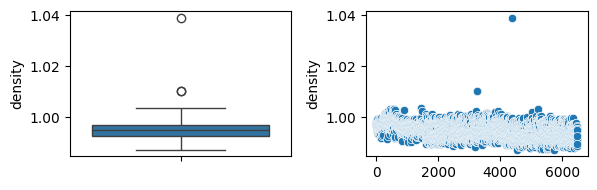

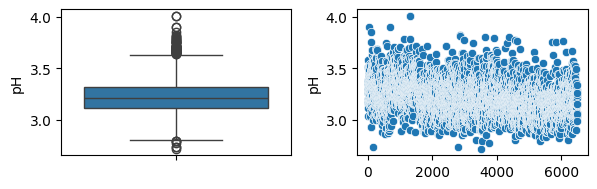

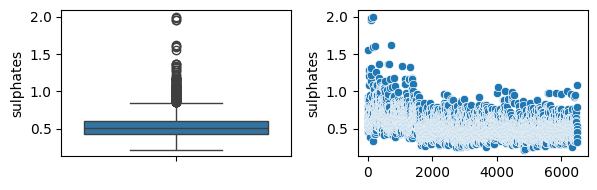

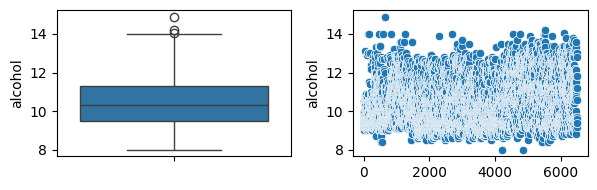

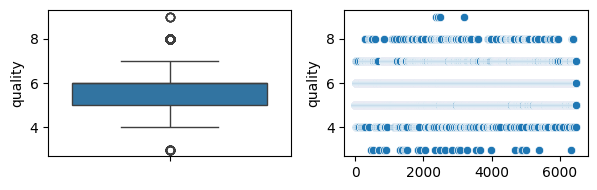

In [6]:
def outlier_plot(data:pd.DataFrame):
    plot_row=1
    plot_index=0
    for key in data.keys():
        plt.subplot(plot_row,4,1) # 1 row, 2 columns, first plot
        sns.boxplot(data[key])
        
        # plt.subplot(plot_row,2,2) # 1 row, 2 columns, first plot
        # sns.violinplot(data[key])
            
        plt.subplot(plot_row,4,2) # 1 row, 2 columns, second plot
        sns.scatterplot(data[key])
        
        plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
        plt.show()
        
    
outlier_plot(df)

In [32]:
feature_cols=ds.data.features.keys()

## Min-max Normalization

In [1]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled=scaler.fit_transform(df[feature_cols])
df_scaled = pd.DataFrame(scaled, columns=feature_cols)
df_scaled.describe()

NameError: name 'df' is not defined

## Log Normalization

In [34]:
for key in df_scaled.keys():
    df_scaled[key]=np.log1p(df_scaled[key])
df_scaled.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.245388,0.155602,0.172920,0.069468,0.073976,0.096087,0.219958,0.135245,0.322737,0.158787,0.300495
std,0.079033,0.088492,0.072970,0.065272,0.048318,0.054554,0.105130,0.050166,0.089289,0.067863,0.124213
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194642,0.095310,0.140286,0.018238,0.047048,0.054067,0.151514,0.096064,0.264152,0.111521,0.196710
50%,0.234647,0.131028,0.171216,0.036149,0.061211,0.092782,0.229574,0.139754,0.321971,0.150935,0.287682
75%,0.279383,0.193371,0.211022,0.108882,0.088947,0.130053,0.296856,0.174353,0.381935,0.193495,0.390866
max,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147


## Mean Normalization

In [35]:
# Mean Normalization
df_mean_normalized=df[feature_cols]
df_mean_normalized = (df_mean_normalized - df_mean_normalized.mean()) / (df_mean_normalized.max() - df_mean_normalized.min())
df_mean_normalized.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6497.000000,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03
mean,-4.812049e-17,1.749836e-17,1.367059e-18,3.280942e-18,0.000000,-4.374590e-18,-8.749179e-18,-2.045121e-16,3.368434e-16,-4.593319e-17,1.159266e-16
std,1.071433e-01,1.097576e-01,8.754088e-02,7.297245e-02,0.058195,6.162986e-02,1.302347e-01,5.781132e-02,1.246412e-01,8.359881e-02,1.728568e-01
min,-2.822568e-01,-1.731107e-01,-1.919477e-01,-7.428275e-02,-0.078129,-1.025185e-01,-2.528677e-01,-1.462625e-01,-3.864348e-01,-1.748698e-01,-3.611306e-01
25%,-6.738075e-02,-7.311067e-02,-4.134531e-02,-5.587784e-02,-0.029957,-4.696291e-02,-8.927321e-02,-4.543347e-02,-8.410918e-02,-5.689229e-02,-1.437393e-01
50%,-1.779397e-02,-3.311067e-02,-5.200732e-03,-3.747293e-02,-0.015006,-5.296248e-03,5.196833e-03,3.727900e-03,-6.589804e-03,-1.194847e-02,-2.779722e-02
75%,4.005727e-02,4.022267e-02,4.299204e-02,4.074792e-02,0.014894,3.637042e-02,9.275444e-02,4.421373e-02,7.868151e-02,3.861333e-02,1.171303e-01
max,7.177432e-01,8.268893e-01,8.080523e-01,9.257172e-01,0.921871,8.974815e-01,7.471323e-01,8.537375e-01,6.135652e-01,8.251302e-01,6.388694e-01


## Z-score Standardization

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # Standardization
scaled = sc.fit_transform(df[feature_cols])
df_scaled=pd.DataFrame(data=scaled,columns=feature_cols)
df_scaled.round().describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.010620,0.003078,-0.001847,-0.102355,0.030476,0.020163,-0.013545,0.006618,0.030937,0.009851,0.021856
std,1.037495,1.043979,1.024333,1.110916,1.066303,1.004329,1.055481,1.046981,1.041088,1.032371,1.045670
min,-3.000000,-2.000000,-2.000000,-1.000000,-1.000000,-2.000000,-2.000000,-3.000000,-3.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,7.000000,8.000000,9.000000,13.000000,16.000000,15.000000,6.000000,15.000000,5.000000,10.000000,4.000000
